In [41]:
%matplotlib notebook

In [42]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

sumtbl = mouse.merge(trial, on = 'Mouse ID', how = 'inner')

# Display the data table for preview
col_names = list(sumtbl.columns)
sumtbl.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [43]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_obj = sumtbl.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
drug_df = pd.DataFrame(drug_obj)

# Preview DataFrame
drug_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [44]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
list_of_sem = sumtbl.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
sem_df = pd.DataFrame(list_of_sem).reset_index()

# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [45]:
# Minor Data Munging to Re-Format the Data Frames
transpose_df = pd.pivot_table(drug_df, index = ['Timepoint'], columns = ['Drug'], values = ['Tumor Volume (mm3)'])

# Preview that Reformatting worked
transpose_df.head(25)

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

<IPython.core.display.Javascript object>


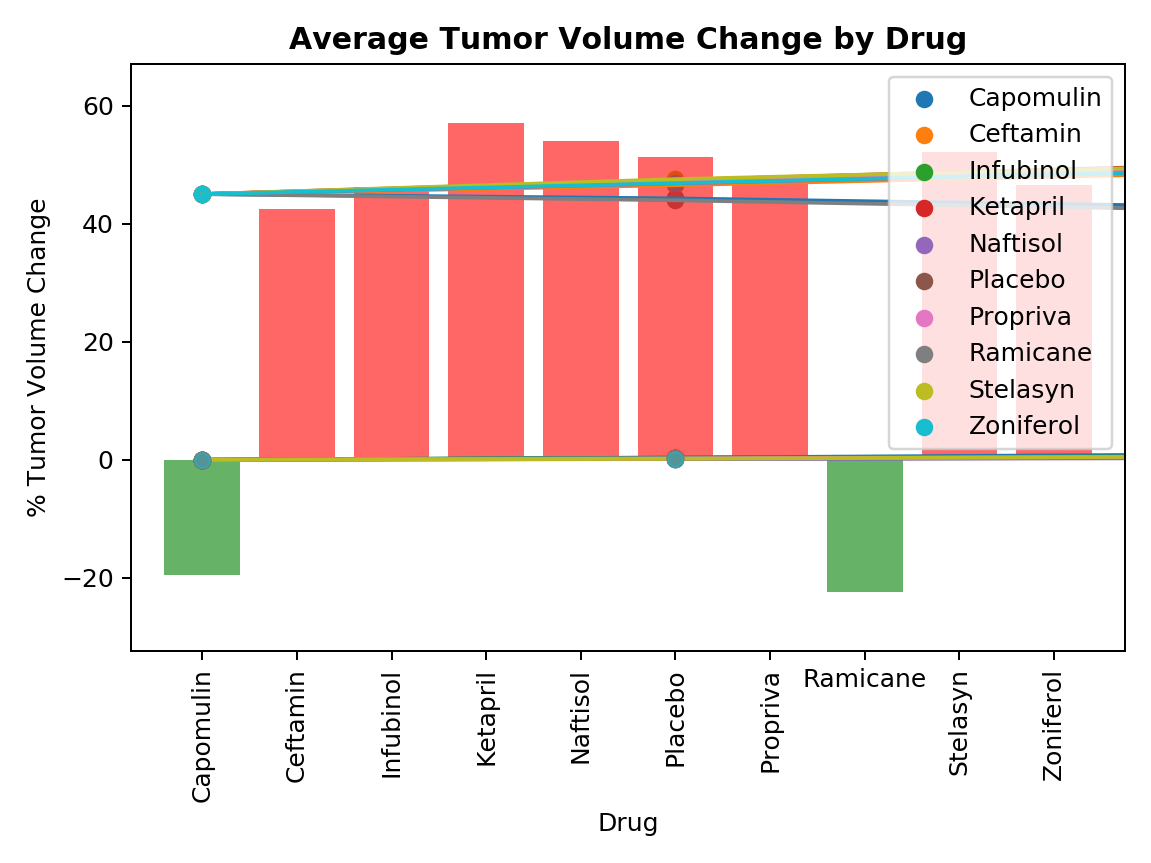

In [46]:
# Prepare data for plot
data = list(transpose_df.columns.levels[1])
data
label_list = []
for i in range(len(data)):
    label_name = str(data[i])
    label_drug = plt.scatter(transpose_df.index, transpose_df['Tumor Volume (mm3)', data[i]], marker = 'o', \
                           label = label_name)
    plt.plot(transpose_df.index, transpose_df['Tumor Volume (mm3)', data[i]])
    label_list.append(label_drug)
    

#Plot Descriptions
plt.legend(handles=label_list, loc="best")
plt.xlabel("Seconds")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Change over Time", fontweight='bold')
plt.xlim(0, max(transpose_df.index) + 20)
plt.tight_layout()
plt.grid()
plt.ylim()

# # Save the Figure
plt.savefig("Images/tum_vol_vs_time.png")


In [47]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [48]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
sites_obj = sumtbl.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()

# Convert to DataFrame
sites_df = pd.DataFrame(sites_obj)

# Preview DataFrame
sites_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [49]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sites_sem_obj = sumtbl.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()

# Convert to DataFrame
sites_sem_df = pd.DataFrame(sites_sem_obj)

# Preview DataFrame
sites_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [50]:
# Minor Data Munging to Re-Format the Data Frames
transpose_sites_df = pd.pivot_table(sites_df, index = ['Timepoint'], \
           columns = ['Drug'], values = ['Metastatic Sites'])

# Preview that Reformatting worked
transpose_sites_df.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

In [51]:
# Generate the Plot (with Error Bars)
# Prepare data for plot
data = list(transpose_sites_df.columns.levels[1])
data

#Used to add drug labels
label_list = []

#Plot Data
for i in range(len(data)):
    label_name = str(data[i])
    label_drug = plt.scatter(transpose_sites_df.index, transpose_sites_df['Metastatic Sites', data[i]],  \
                            label = label_name)
    
    #Homework called for scatter plot, but also wanted us to connect data points with line
    plt.plot(transpose_sites_df.index, transpose_sites_df['Metastatic Sites', data[i]]) 
    
    #Get error from sem dataframe
    error = sites_sem_df['Metastatic Sites'][data[i]]
    
    #Add error bars to plot
    plt.errorbar(transpose_sites_df.index, transpose_sites_df['Metastatic Sites', data[i]] , \
             yerr=error, fmt="o", alpha=0.5, label="Metastatic Sites")
    
    #Add drug name to list of labels
    label_list.append(label_drug)

#Plot Descriptions
plt.legend(handles=label_list, loc="best", fancybox = True)
plt.xlabel("Seconds")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Sites vs. Time", fontweight='bold')
plt.xlim(0, max(transpose_df.index) + 20)
plt.grid()
plt.ylim()

#Save the Figure
plt.savefig("Images/metastatic_sites.png")


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [52]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survive_obj = sumtbl.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
survive_df = pd.DataFrame(survive_obj)

# Preview DataFrame
survive_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [53]:
# Minor Data Munging to Re-Format the Data Frames
transpose_survive_df = pd.pivot_table(survive_df, index = ['Timepoint'], \
           columns = ['Drug'], values = ['Mouse ID'])


# Preview the Data Frame
transpose_survive_df.head()


Mouse ID                                                        \
Drug      Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                   
0                25       25        25       25       25      25       26   
5                25       21        25       23       23      24       25   
10               25       20        21       22       21      24       23   
15               24       19        21       19       21      20       17   
20               23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

In [54]:
#Starting Values for each drug
start_vals = transpose_survive_df.loc[0]

#Get column names
data = transpose_survive_df.columns.levels[1]

#Used to get labels for each drug
label_list = []
for i in range(len(data)):
    label_name = str(data[i])
    
    #Calculate percent of mice remaining compared to initial value
    pct_rem = (transpose_survive_df['Mouse ID', data[i]]) / (start_vals[i]) * 100
    
    #Create scatter plot
    label_drug = plt.scatter(transpose_survive_df.index, pct_rem, \
                           label = label_name)
    
    #Homework asked for scatter plot, but wanted lines connecting each data point
    plt.plot(transpose_survive_df.index, pct_rem)
    label_list.append(label_drug)

#Plot Descriptions
plt.legend(handles=label_list, loc="best")
plt.xlabel("Seconds")
plt.ylabel("Survival Rate (%)")
plt.title("Survivors vs. Time", fontweight='bold')
plt.xlim(0, max(transpose_df.index) + 20)
plt.ylim()
plt.grid()



# Save the Figure
plt.savefig("Images/survival_rate.png")

# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [55]:
# Calculate the percent changes for each drug (Tumor Volume)
#Initial Values
initial_values = list(transpose_df.iloc[9])
initial_values

#Final Values
num_columns = len(transpose_df.index)
final_values = list(transpose_df.iloc[0])
final_values

#Create dataframe to calculate percent change
change_df = pd.DataFrame(initial_values, final_values).reset_index()
change_df.columns = ["Starting Value", "Final Value"]

#Store percent change
change_df["Percent Change"] = (change_df["Final Value"] - change_df['Starting Value'] ) / \
    change_df["Starting Value"] * 100

#Get list of drug names
data = list(transpose_df.columns.levels[1])

#Create array to contain drug names
label_list = []

for i in range(len(data)):
    label_name = str(data[i])
    label_list.append(label_name)
change_df.index = label_list

# Display the data to confirm
change_df


,Starting Value,Final Value,Percent Change
Capomulin,45.0,36.236114,-19.475303
Ceftamin,45.0,64.132421,42.516492
Infubinol,45.0,65.755562,46.123472
Ketapril,45.0,70.662958,57.028795
Naftisol,45.0,69.265506,53.923347
Placebo,45.0,68.084082,51.297960
Propriva,45.0,66.258529,47.241175
Ramicane,45.0,34.955595,-22.320900
Stelasyn,45.0,68.438310,52.085134
Zoniferol,45.0,65.960888,46.579751


<IPython.core.display.Javascript object>


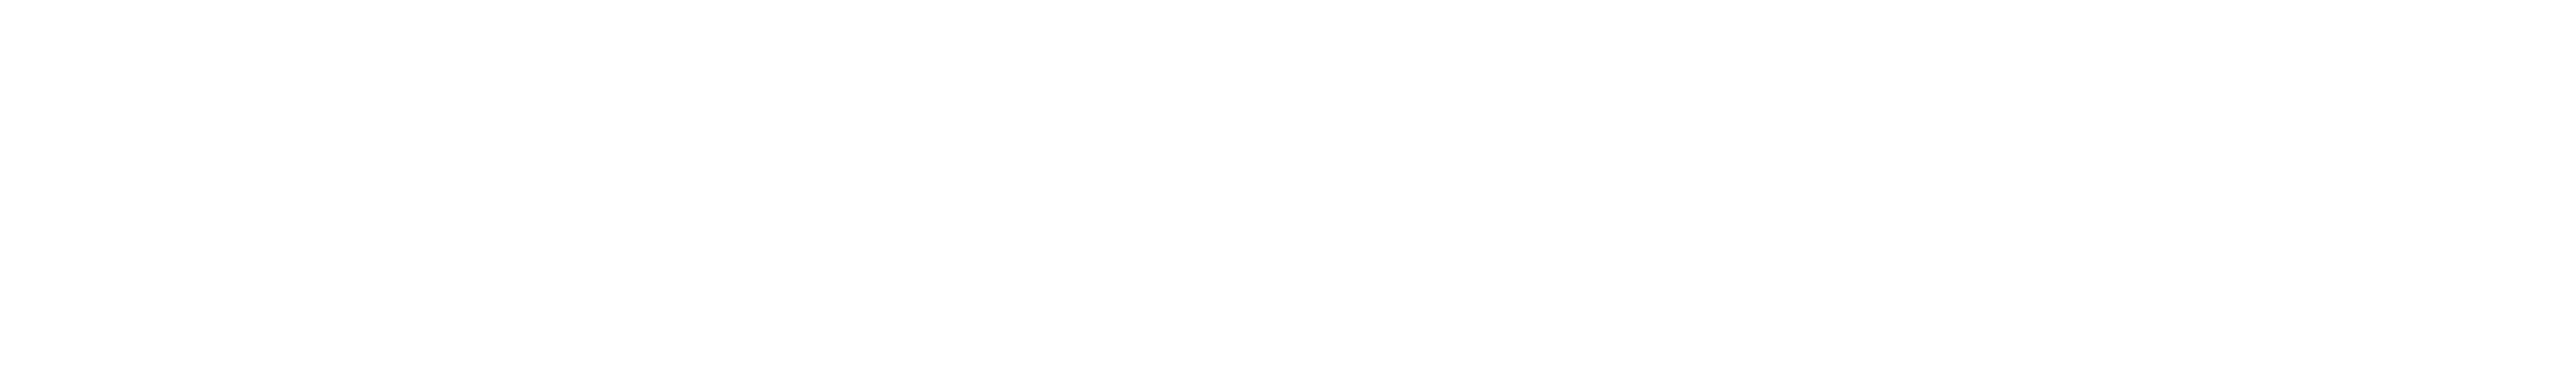

In [56]:
# Store all Relevant Percent Changes into a Tuple
change_tuple = tuple(change_df['Percent Change'])
change_tuple

#Get max/min values to format chart
max_val = max(change_tuple)
min_val = min(change_tuple)

# Orient widths. Add labels, tick marks, etc. 
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.title("Average Tumor Volume Change by Drug", fontweight='bold')
plt.xlim(-0.75, len(label_list)-0.25)
plt.ylim(min_val - 10, max_val +10)
plt.xticks(rotation="vertical")

colors = []

#For loop to create list that will determine colors for each drug
for row in change_tuple:  
    if row > 0:
        colors.append('r')
    else:
        colors.append('g')

#Create bar chart
pct_bar = plt.bar(label_list, change_df['Percent Change'], color= colors, \
                alpha = .6, align = "center", label = change_tuple)     

#plt.text(label_list, change_df['Percent Change'], change_df['Percent_Change'])

#More formatting
plt.grid()
plt.tight_layout()

#Had to save before plt.figure because it was producing a blank .png otherwise
plt.savefig("Images/tumor_volume_bar.png")

plt.figure(figsize=(20,3))
# Save the Figure


# # Show the Figure
plt.show()




![Metastatic Spread During Treatment](../Images/change.png)